In [2]:

%load_ext autoreload
%autoreload 2
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('..'))


# Agrégation de la base de données 

In [34]:
import pandas as pd
import traceback
import src.config as cfg
from src.data_loader import FitbitDataLoader, SecondaryDataLoader, DataAggregator

PARTICIPANTS = ["p01", "p03", "p05"]

ALL_DATAFRAMES = []

print(f"Démarrage du Traitement par Lot pour : {PARTICIPANTS}\n")

for p_id in PARTICIPANTS:
    print(f"--- Traitement de {p_id} ---")
    
    try:
        loader_fb = FitbitDataLoader(p_id)
        
        fitbit_data = {
            "steps": loader_fb.load_simple_timeseries("steps.json"),
            "calories": loader_fb.load_simple_timeseries("calories.json"),
            "distance": loader_fb.load_simple_timeseries("distance.json"),
            "resting_heart_rate": loader_fb.load_resting_heart_rate(),
            "hr_zones": loader_fb.load_heart_rate_zones(),
            "sleep": loader_fb.load_sleep(),
            "sleep_score": loader_fb.load_sleep_score_csv(),
            "exercises": loader_fb.load_exercises()
        }

        loader_sec = SecondaryDataLoader(p_id)
        
        secondary_data = {
            "wellness": loader_sec.load_wellness(),
            "srpe": loader_sec.load_srpe(),
            "injury": loader_sec.load_injury(),
            "reporting": loader_sec.load_reporting()
        }
        
        static_data = loader_sec.load_overview()

        aggregator = DataAggregator(fitbit_data, secondary_data, static_data)
        df_participant = aggregator.run()
        
        if not df_participant.empty:
            df_participant.insert(0, 'participant_id', p_id)
            
            ALL_DATAFRAMES.append(df_participant)
            print(f"   Succès : {df_participant.shape[0]} jours récupérés.")
        else:
            print(f"   Attention : DataFrame vide pour {p_id}")

    except Exception as e:
        print(f"   ERREUR sur {p_id} : {e}")

    print("-" * 30)

print("\nFusion de tous les participants...")

global_df = pd.concat(ALL_DATAFRAMES, ignore_index=True)
    
output_filename = cfg.DATA_DIR / "GLOBAL_DATASET_FULL.csv"
global_df.to_csv(output_filename, index=False)
   

    

Démarrage du Traitement par Lot pour : ['p01', 'p03', 'p05']

--- Traitement de p01 ---
   Succès : 161 jours récupérés.
------------------------------
--- Traitement de p03 ---
   Succès : 156 jours récupérés.
------------------------------
--- Traitement de p05 ---
   Succès : 161 jours récupérés.
------------------------------

Fusion de tous les participants...


# Données de nutrition

In [36]:
import io

csv_content = """name,calories,protein,carbs,fat
apple_pie,237,1.9,34,10.6
baby_back_ribs,292,15.2,10.3,21.3
baklava,428,6.2,37.3,29
beef_carpaccio,123,24,0.5,2.6
beef_tartare,173,18.4,1.2,10.3
beet_salad,84,1.8,9.7,4.3
beignets,326,5.3,35.2,18.9
bibimbap,143,4.9,19.8,5.1
bread_pudding,175,4.3,28.4,6.1
breakfast_burrito,223,8.7,20.1,11.4
bruschetta,152,3.9,17.8,7.3
caesar_salad,44,2.8,3.2,2.1
cannoli,282,5.8,27.1,16.4
caprese_salad,162,7.9,3.8,12.9
carrot_cake,415,3.9,58.3,18.7
ceviche,86,14.8,3.9,1.2
cheesecake,321,5.5,25.5,22.5
cheese_plate,365,19.8,9.7,26.9
chicken_curry,118,12.3,5.9,5.2
chicken_quesadilla,227,11.8,18.2,12.1
chicken_wings,203,18.3,0,14.4
chocolate_cake,371,4.1,53.4,15.1
chocolate_mousse,225,4.1,22.3,14.2
churros,298,4.2,30.1,18.4
clam_chowder,73,3.4,7.2,3.1
club_sandwich,222,11.9,19.8,10.2
crab_cakes,183,14.2,9.1,10.4
creme_brulee,332,3.9,17.8,27.9
croque_madame,238,10.8,15.2,14.7
cup_cakes,305,3.2,37.4,16.1
deviled_eggs,182,10.3,1.2,15.1
donuts,452,4.9,51.3,25.2
dumplings,162,6.1,24.8,4.2
edamame,122,11.9,8.9,5.2
eggs_benedict,258,10.9,10.2,19.8
escargots,90,16.1,2,1.4
falafel,333,13.3,31.8,17.8
filet_mignon,267,26,0,17.1
fish_and_chips,195,9.2,20.1,8.9
foie_gras,462,11.4,4.7,43.8
french_fries,312,3.4,41.4,14.7
french_onion_soup,58,3.1,6.8,1.9
french_toast,229,7.3,28.2,9.8
fried_calamari,173,14.2,11.8,8.4
fried_rice,163,5.5,25.1,4.3
garlic_bread,350,8.4,41.8,16.3
gnocchi,153,3.9,30.2,1.2
greek_salad,103,4.1,5.2,7.3
grilled_cheese_sandwich,303,10.2,25.1,18.4
grilled_salmon,206,22.1,0,12.3
guacamole,160,2,8.5,14.7
gyoza,182,7.8,21.9,6.4
hamburger,295,17.1,24.2,14.3
hot_and_sour_soup,42,2.8,4.9,1.1
hot_dog,290,10.1,20.2,18.9
hummus,166,7.9,14.3,9.6
ice_cream,207,3.5,23.6,11
lasagna,135,7.2,12.1,6.9
lobster_bisque,98,4.9,5.8,6.2
lobster_roll_sandwich,198,14.1,18.2,8.1
macaroni_and_cheese,371,11.8,40.1,18.2
macarons,402,7.1,55.2,17.9
miso_soup,32,2.1,3.8,1.2
mussels,172,23.8,7.4,4.5
nachos,306,7.9,30.2,17.1
omelette,154,10.6,0.6,11.7
onion_rings,402,3.9,43.1,24.3
oysters,59,6.9,3.9,1.8
pad_thai,148,6.1,19.8,5.8
paella,158,8.9,20.2,4.1
pancakes,227,6.4,28.3,9.7
panna_cotta,253,3.9,20.1,17.4
peking_duck,337,18.2,0,28.4
pho,82,7.1,11.9,1.2
pizza,266,11.4,33.3,9.7
pork_chop,231,24.2,0,14.3
poutine,228,8.2,25.1,11.3
prime_rib,402,18.1,0,36.2
pulled_pork_sandwich,263,13.8,24.1,12.2
ramen,84,4.9,10.2,3.1
ravioli,148,5.8,21.9,4.8
red_velvet_cake,371,3.8,50.2,17.1
risotto,163,3.9,20.1,7.2
samosa,262,6.2,30.4,12.8
sashimi,128,24.2,0,3.8
scallops,111,20.5,5.4,0.8
seaweed_salad,45,3,9.1,0.6
shrimp_and_grits,138,7.8,12.1,6.9
spaghetti_bolognese,153,7.9,19.8,5.2
spaghetti_carbonara,288,10.2,25.3,15.8
spring_rolls,154,4.1,19.8,6.3
steak,271,26.1,0,19.2
strawberry_shortcake,302,3.2,40.1,14.2
sushi,143,4.8,28.1,1.1
tacos,226,8.9,19.8,12.3
takoyaki,172,7.9,20.1,7.1
tiramisu,304,5.2,30.1,18.3
tuna_tartare,148,22.1,1.9,5.8
waffles,291,7.4,32.9,14.2
default,200,10,20,10"""

df_nutrition = pd.read_csv(io.StringIO(csv_content))

output_path = cfg.DATA_DIR / "nutrition_db.csv"
df_nutrition.to_csv(output_path, index=False)



In [7]:
import pandas as pd
import src.config as cfg
from src.nutrition_loader import ImageNutritionLoader
import os

participants = ["p01", "p03", "p05"]
all_data = []

for p_id in participants:
    images_dir = cfg.DATA_DIR / p_id / "food-images"
    try:
        loader = ImageNutritionLoader(p_id, images_dir)
        df_raw = loader.process_images()
        
        if not df_raw.empty:
            df_daily = df_raw.groupby(['participant_id', 'date']).agg({
                'confidence': 'mean',
                'calories': 'sum',
                'protein_g': 'sum',
                'carbs_g': 'sum',
                'fat_g': 'sum'
            }).reset_index()
            
            df_daily['confidence'] = df_daily['confidence'].round(2)
            all_data.append(df_daily)
    except Exception:
        continue

if all_data:
    final_nutrition_df = pd.concat(all_data, ignore_index=True)
    final_nutrition_df = final_nutrition_df.sort_values(['participant_id', 'date'])
    output_file = cfg.DATA_DIR / "nutrition_daily_all_participants.csv"
    final_nutrition_df.to_csv(output_file, index=False)

Device set to use cpu
Device set to use cpu
Device set to use cpu


# Présentation de la base de données

/app/src/data_presentation.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


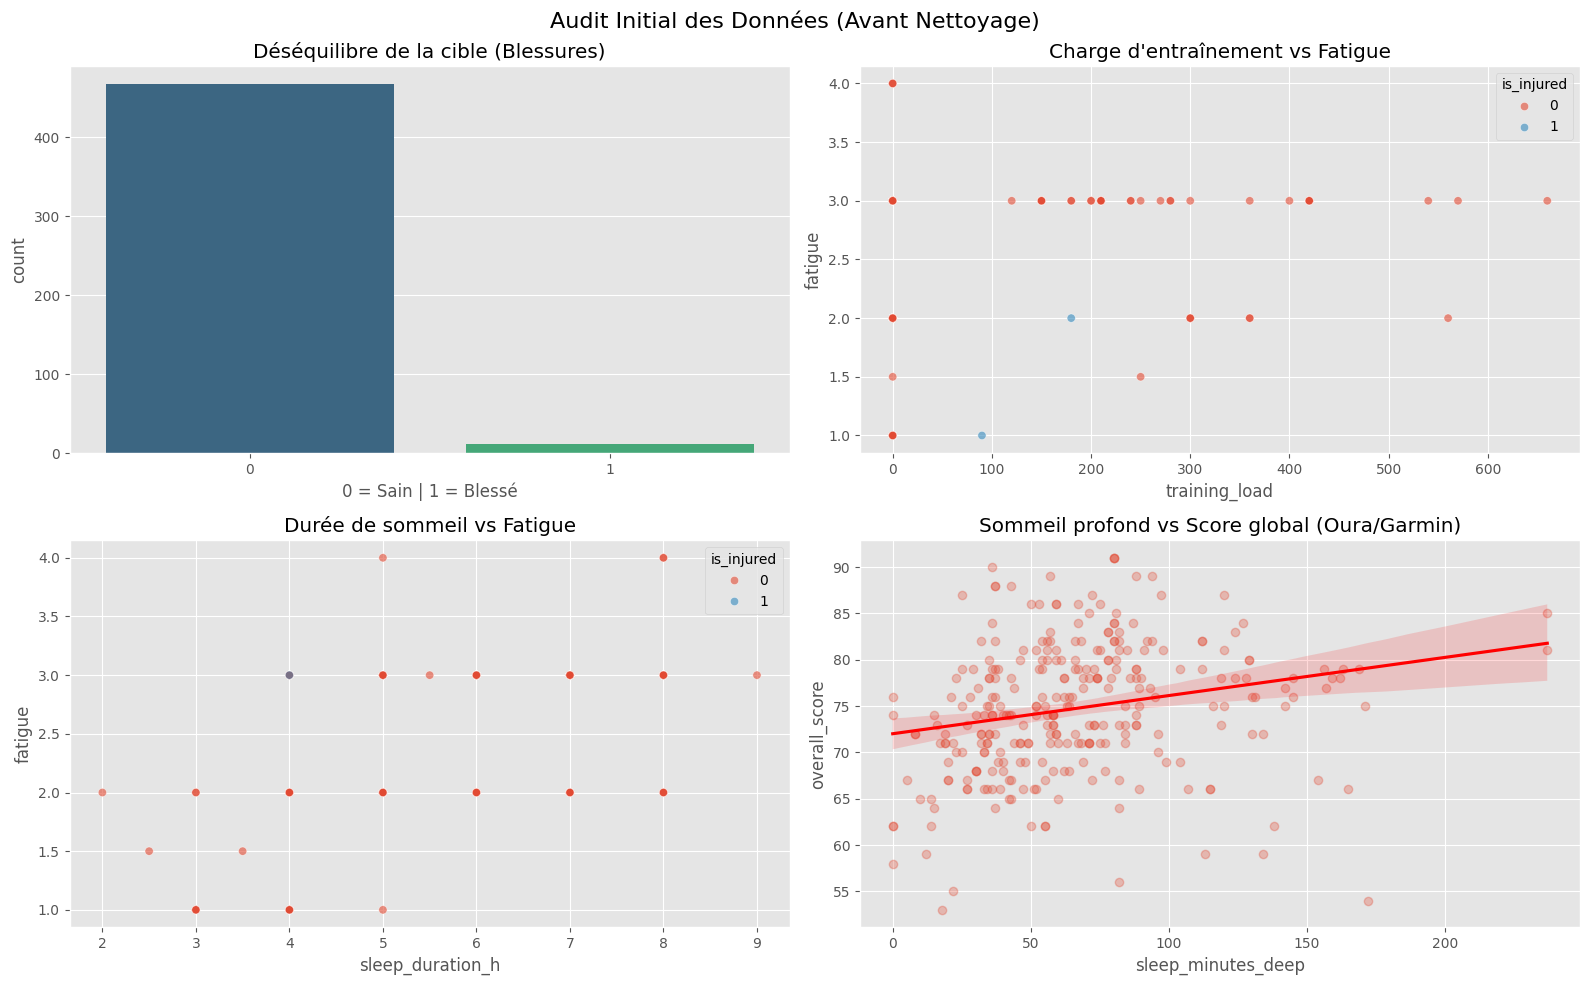

In [24]:

from src.data_presentation import load_merge_and_audit
df = load_merge_and_audit()

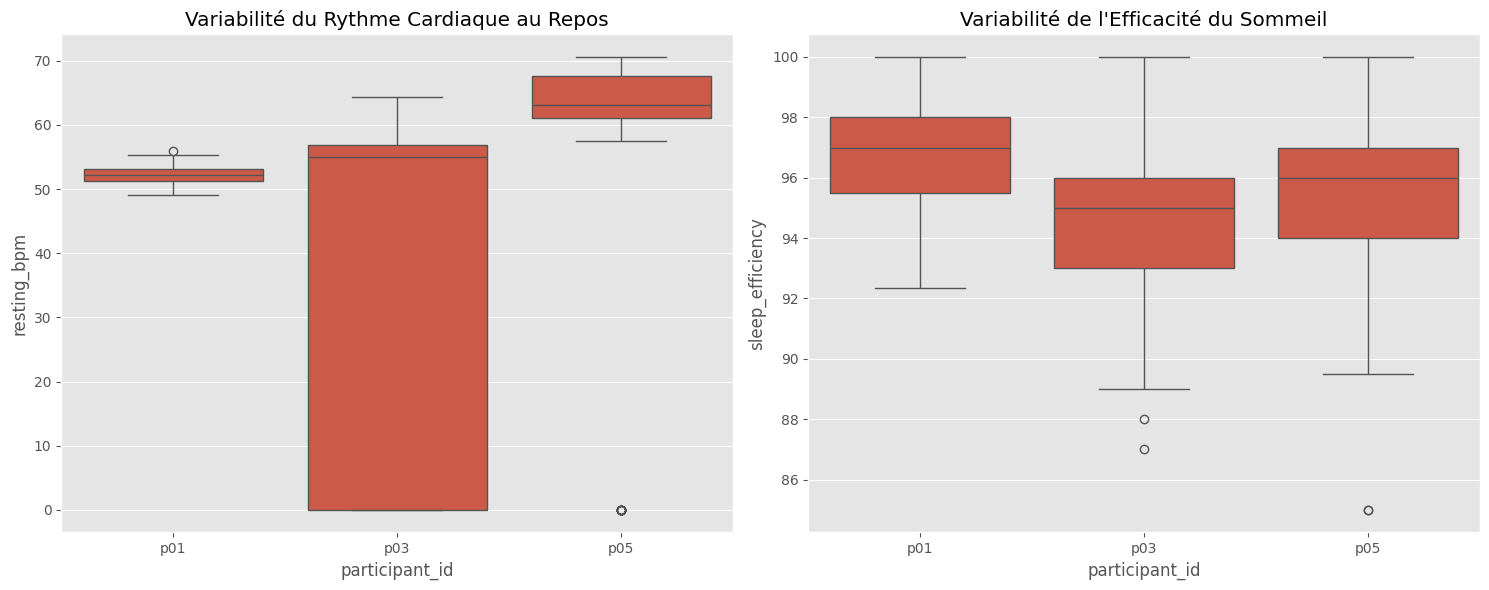

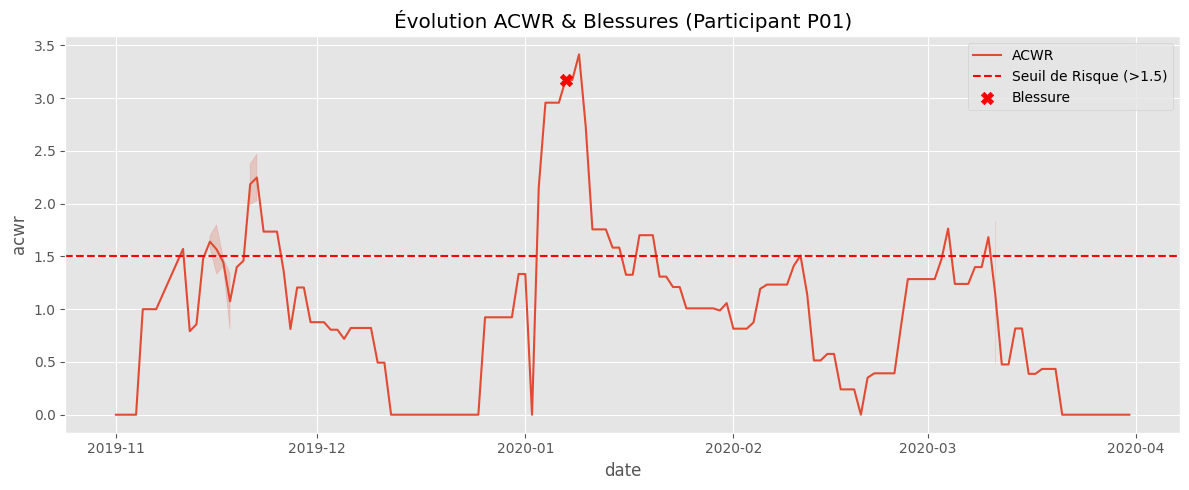

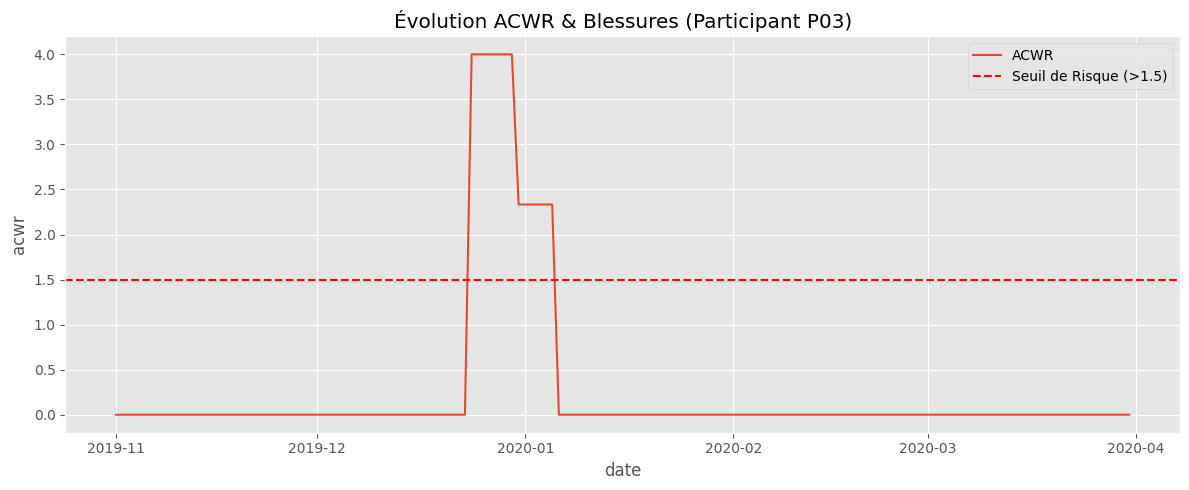

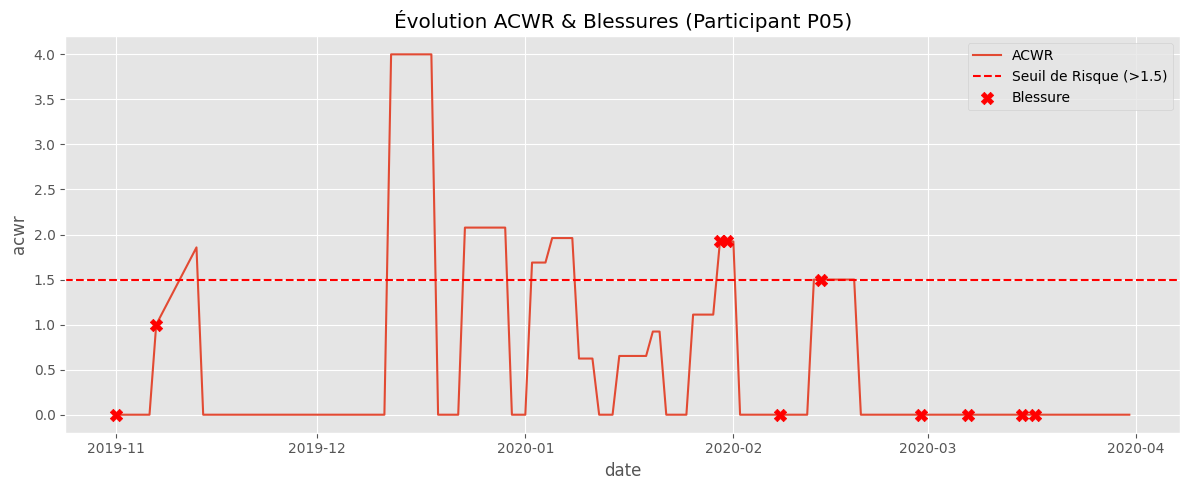

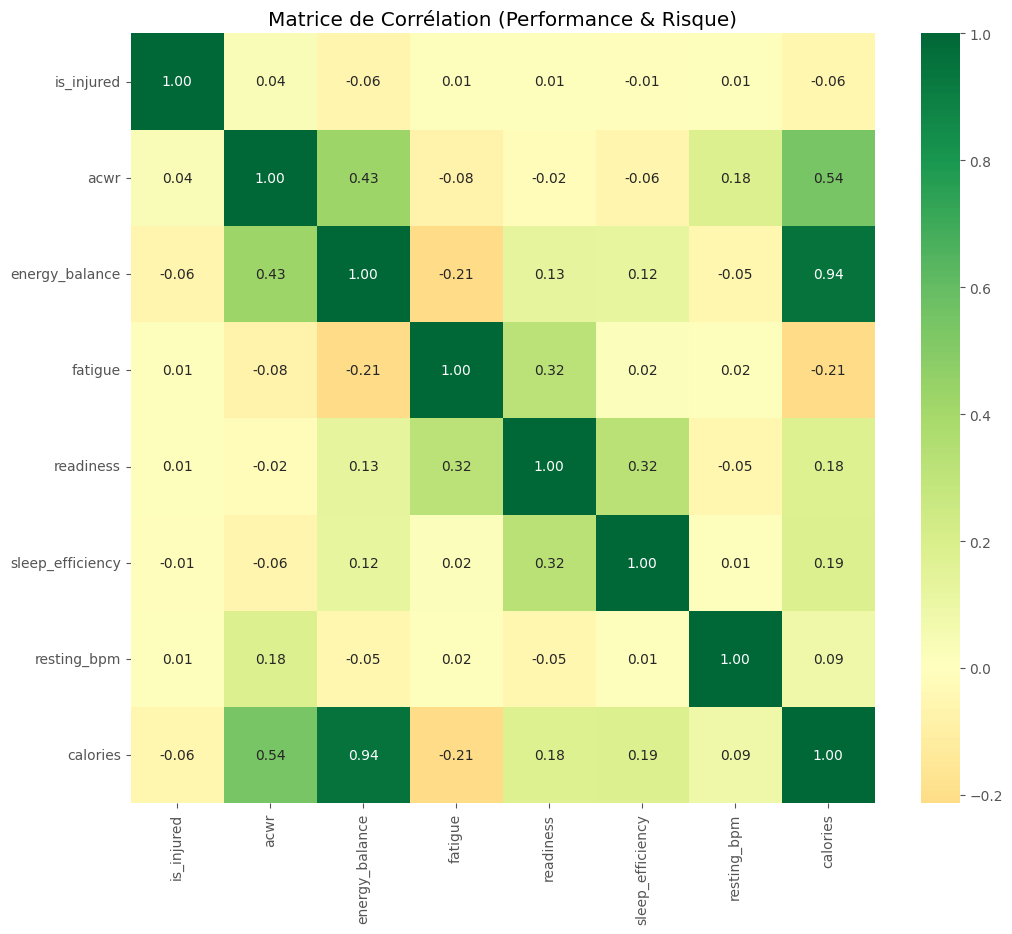

In [25]:
from src.data_presentation import  run_feature_engineering_pipeline
df = run_feature_engineering_pipeline(df, plot=True)

In [26]:
from src.data_presentation import analyze_enriched_data
df = analyze_enriched_data(df, plot=True)

Stats Moyennes (3 jours avant blessure):
acwr                  0.865324
sleep_eff_3d_avg     95.952381
energy_bal_3d_avg    -6.691389
dtype: float64
                  Moyenne Sains  Moyenne Blessés  Différence (%)
training_load             25.65            24.55           -4.32
acwr                       0.61             0.87           42.86
sleep_efficiency          95.78            95.60           -0.18
energy_balance          -141.31          -859.04          507.90
fatigue                    2.69             2.73            1.57
soreness                   2.80             2.91            3.81
readiness                  4.67             4.82            3.14
                Nb_Blessures  Rapports_Wellness  Photos_Nutrition
participant_id                                                   
p01                        1                146                63
p03                        0                 81                51
p05                       10                143                51


## Histogramme


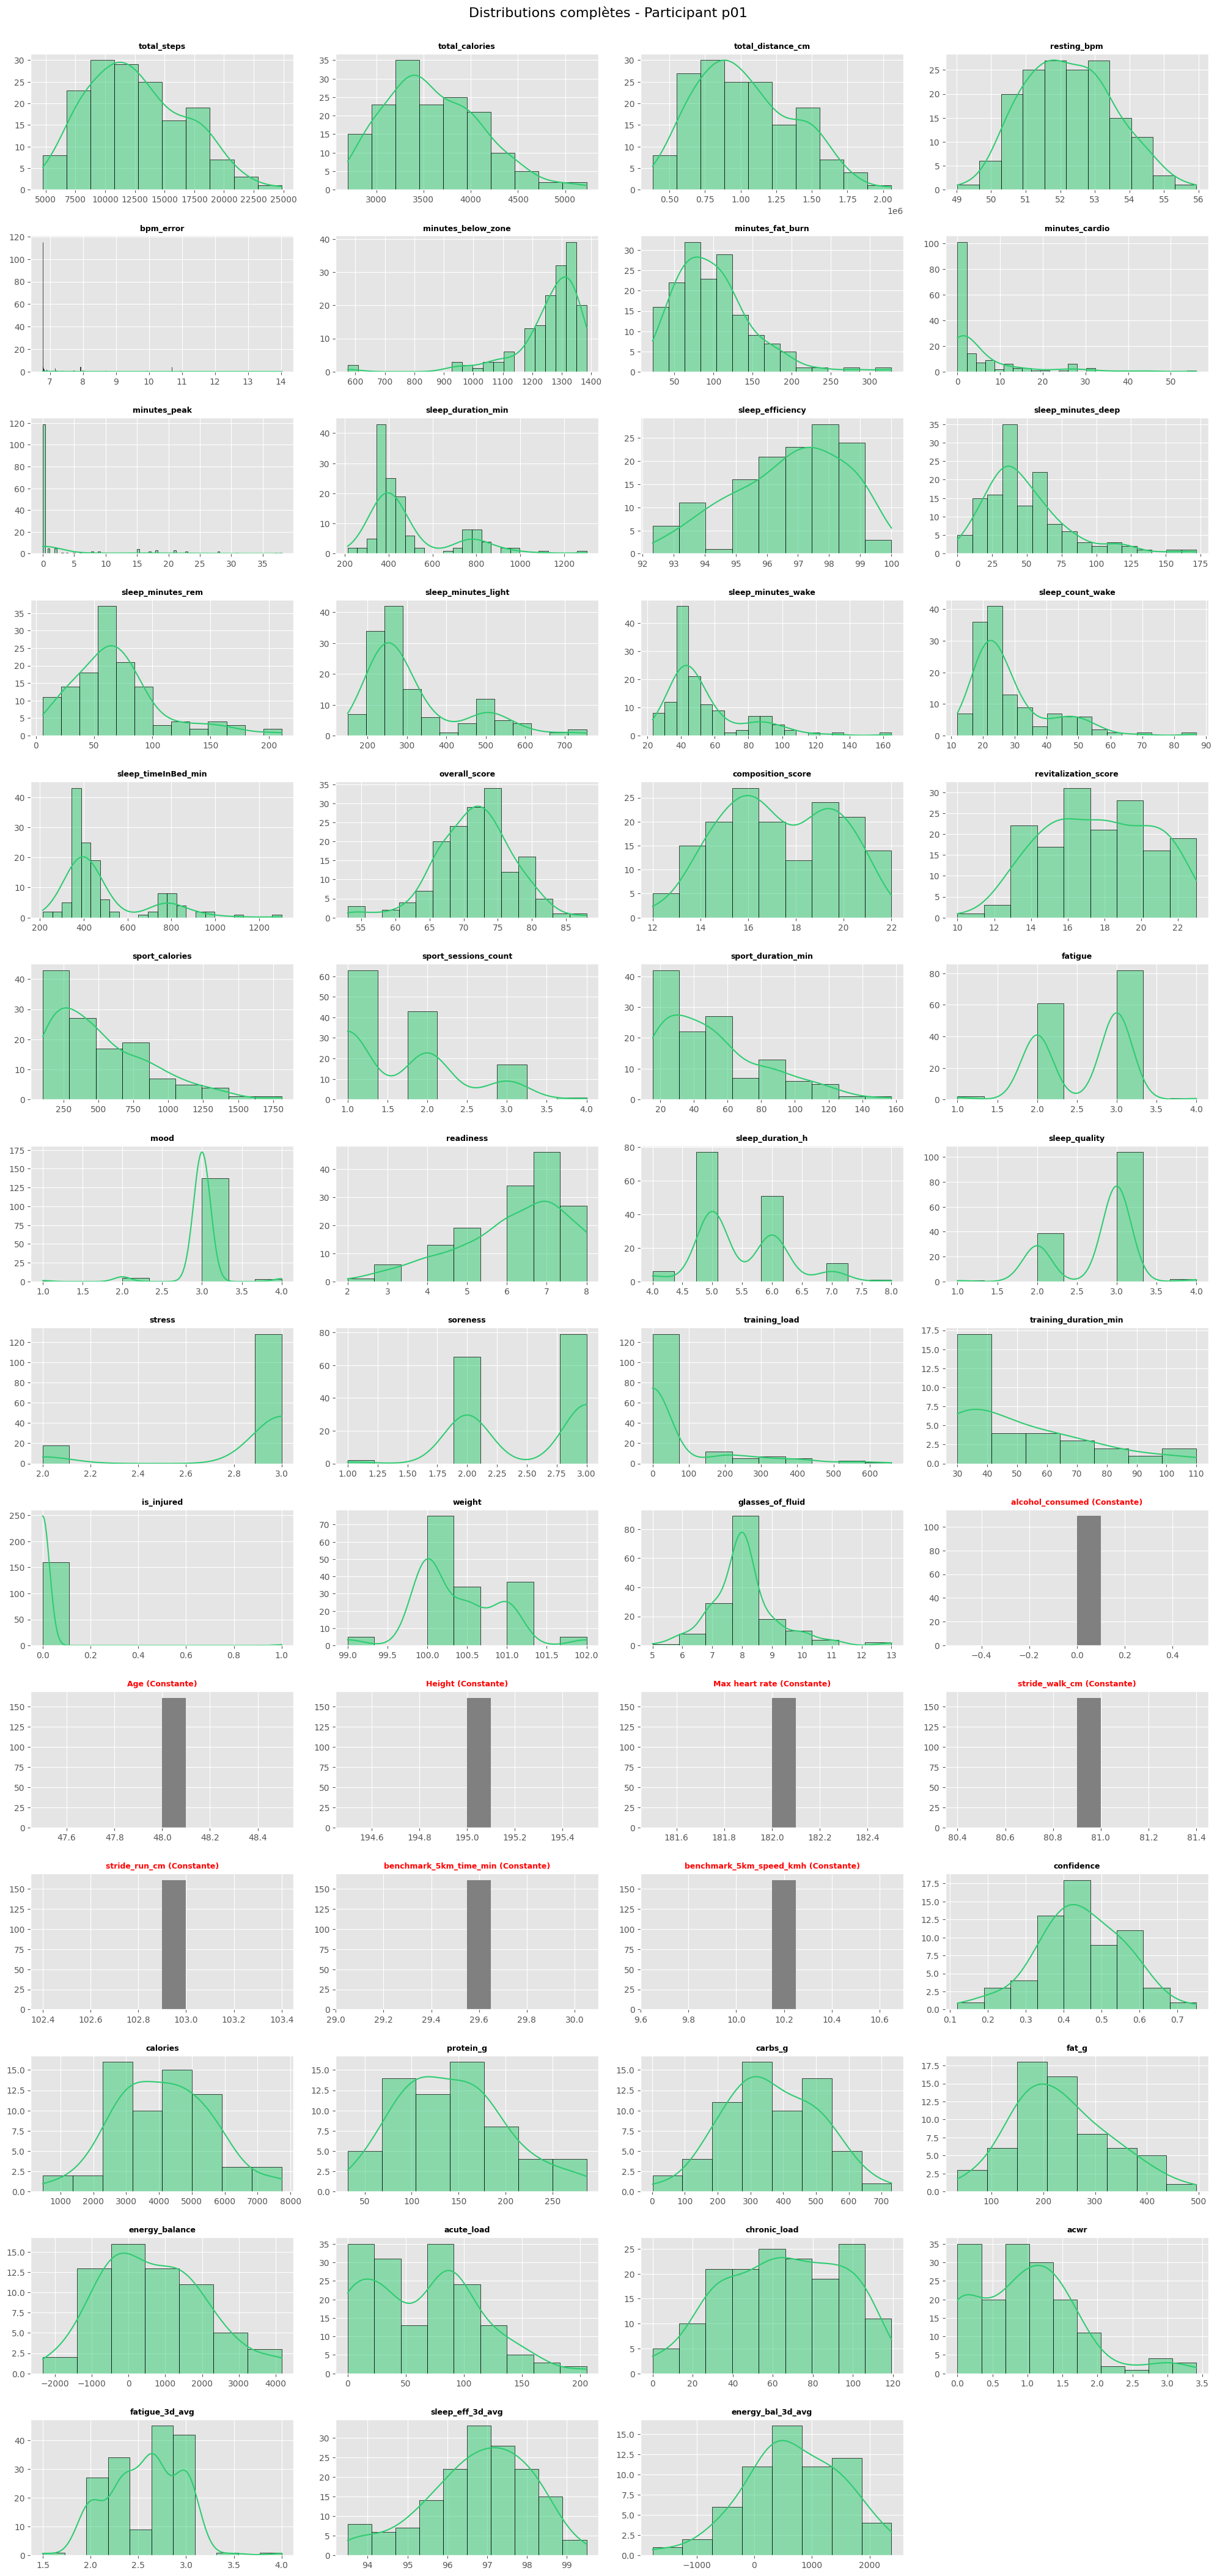

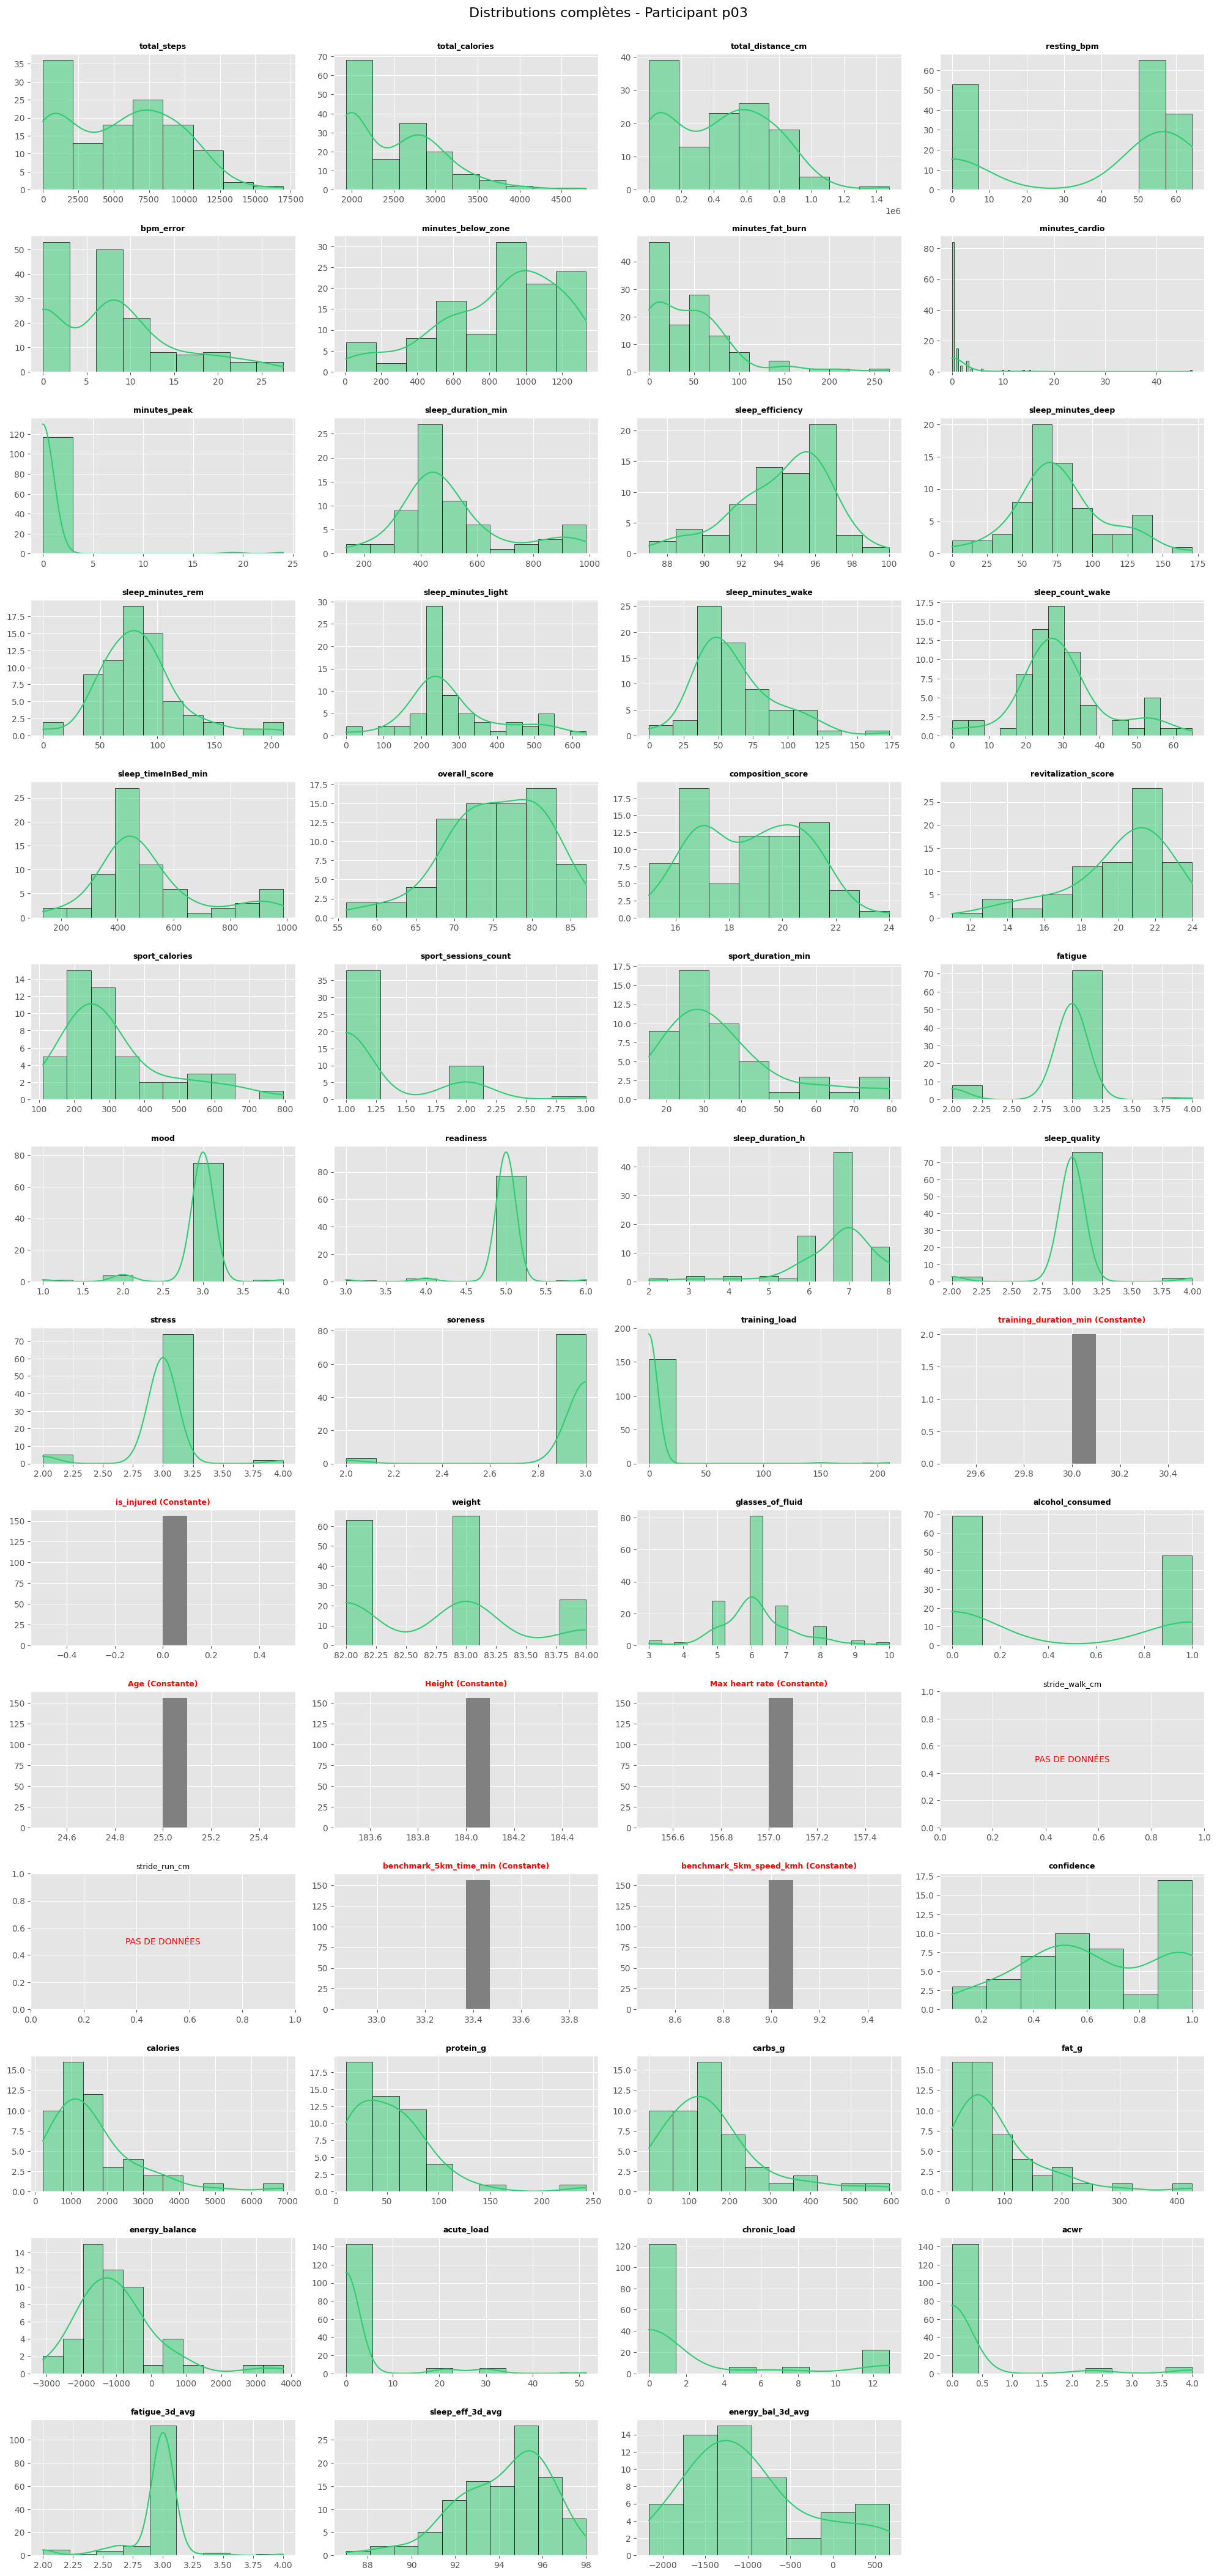

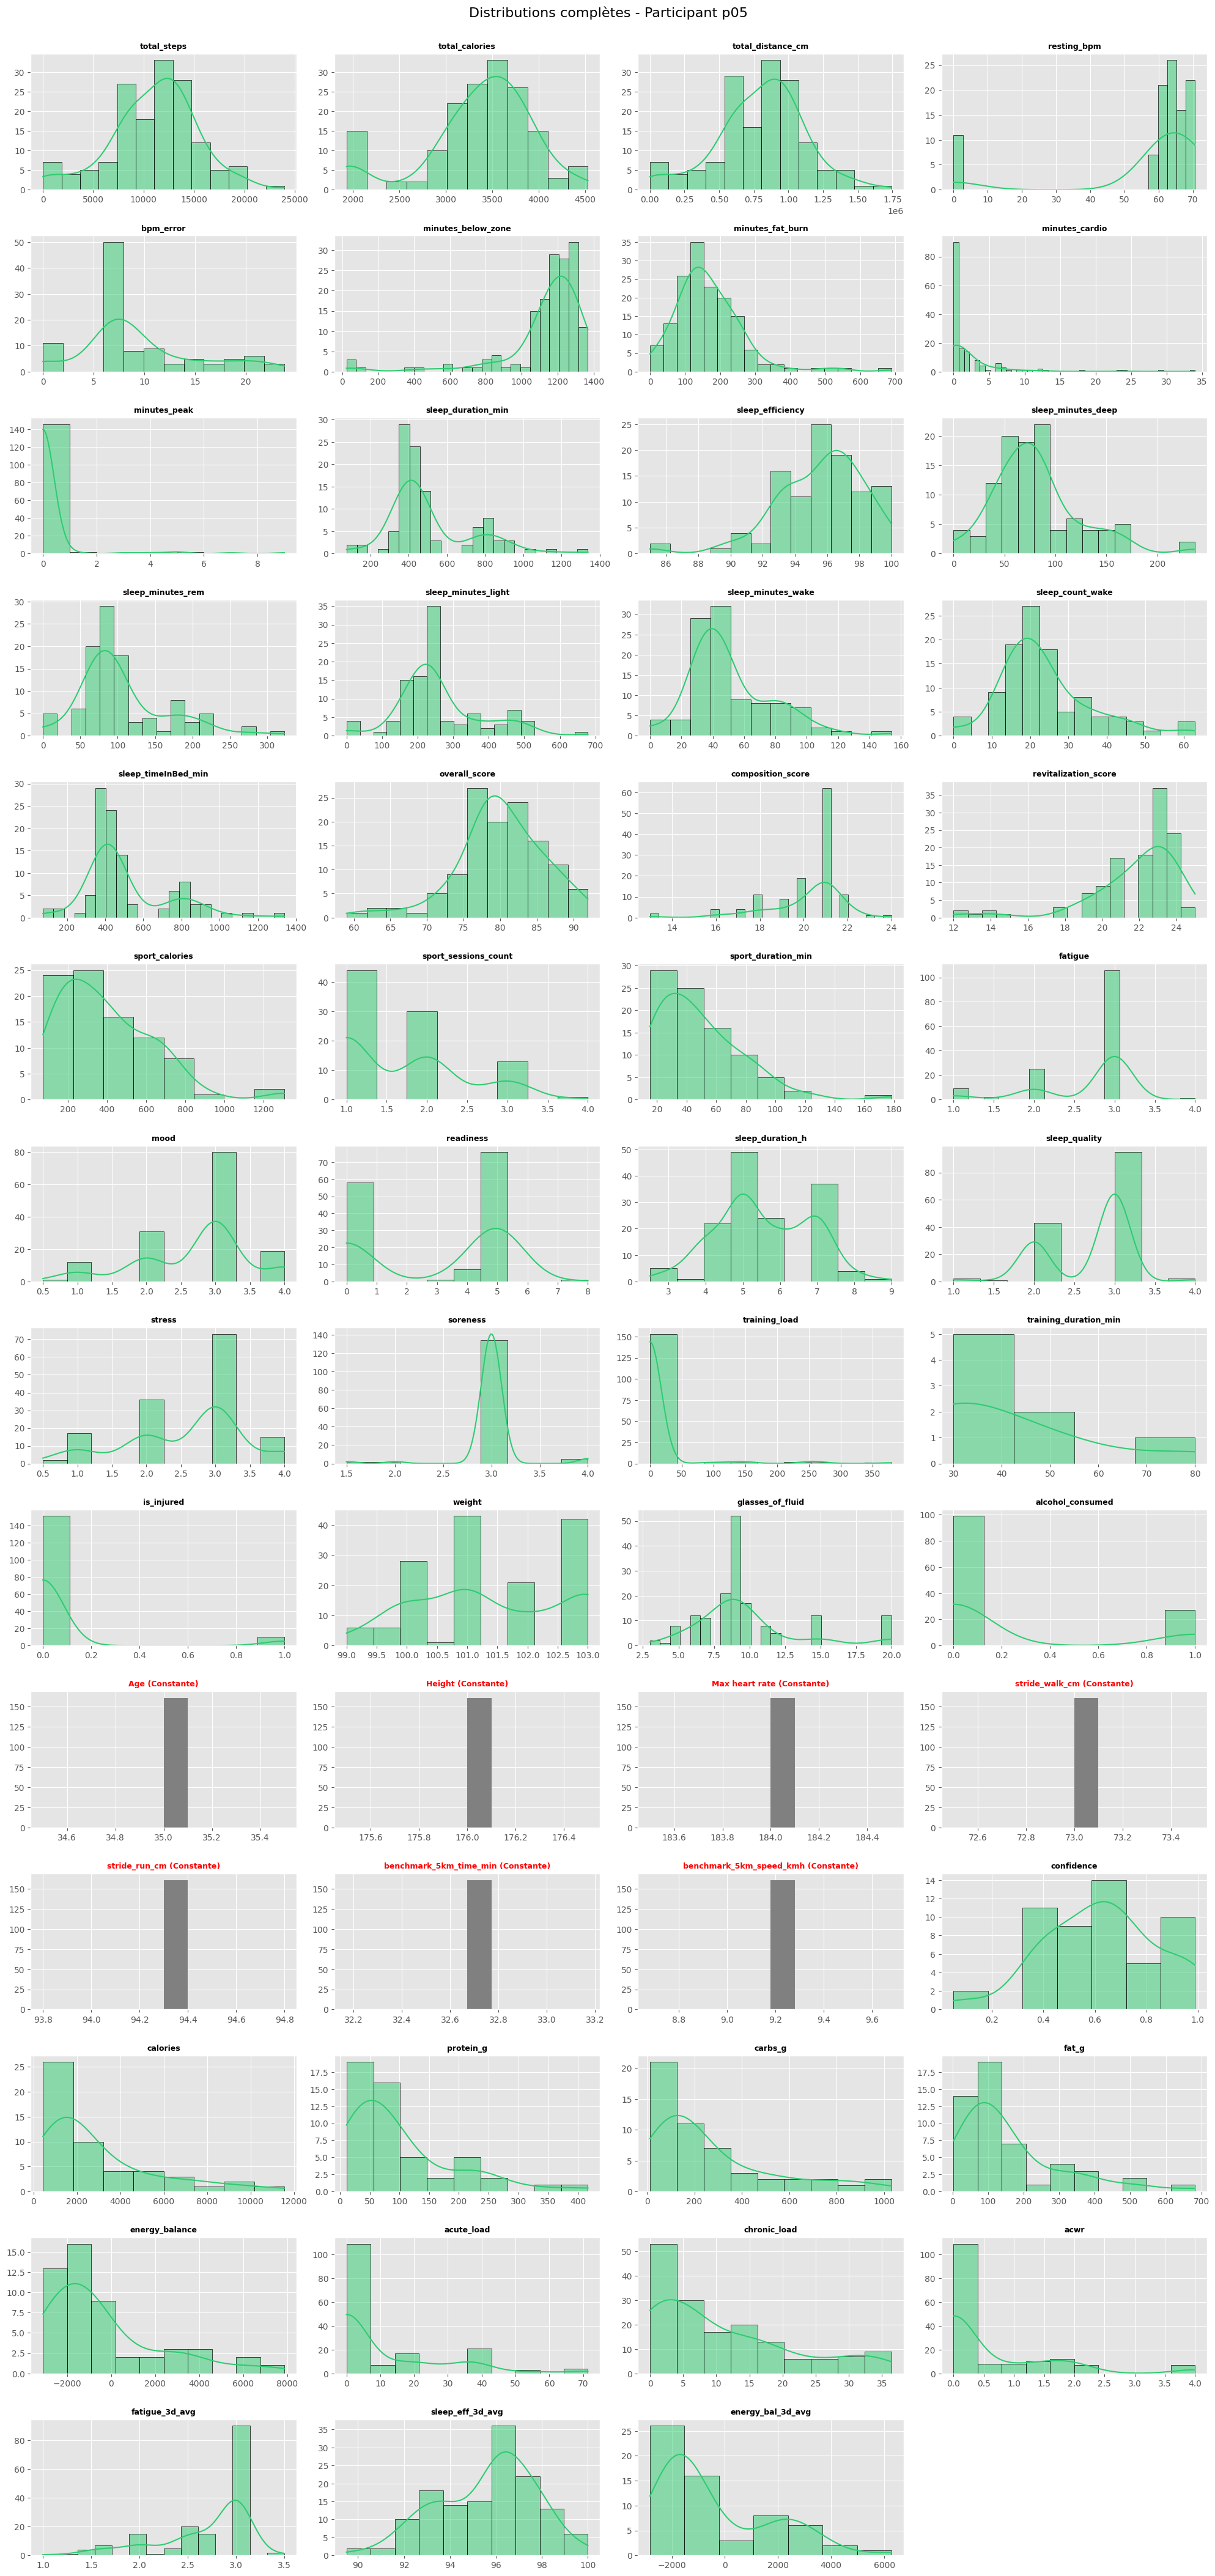

In [27]:
from src.data_presentation import visualize_distributions_by_participant
visualize_distributions_by_participant(df, specific_participants=['p01', 'p03', 'p05'])

# Prétraitement des données 

## Gestion des types de données

In [70]:
from src.preparation_data import encode_categorical_features
df= encode_categorical_features()

## Supression des colonnes

In [71]:
from src.preparation_data import remove_features
df = remove_features(df)

# Outoutlier et Gestion manquantes

In [74]:
from src.preparation_data  import clean_and_impute_simple
df_simple= clean_and_impute_simple(df)

In [83]:
from src.preparation_data  import clean_outliers_and_impute_Mice_KNN
df_Mice = clean_outliers_and_impute_Mice_KNN(df, method='MICE')

In [73]:
df_KNN = clean_outliers_and_impute_Mice_KNN(df, method='KNN')

In [80]:
from src.preparation_data  import verify_data_quality
verify_data_quality(df_Mice)
print("Vérification de la qualité des données terminée.")
verify_data_quality(df_KNN)
print("Vérification de la qualité des données terminée.")
verify_data_quality(df_simple)
print("Vérification de la qualité des données terminée.")

total_steps               | 0        | 0.00       | 21731.40   | OK
total_calories            | 0        | 1929.60    | 5225.82    | OK
resting_bpm               | 0        | 40.00      | 70.03      | OK
minutes_below_zone        | 0        | 7.00       | 1384.00    | OK
minutes_fat_burn          | 0        | 0.00       | 689.00     | OK
minutes_cardio            | 0        | 0.00       | 56.00      | OK
minutes_peak              | 0        | 0.00       | 38.00      | OK
sleep_duration_min        | 0        | 74.00      | 1339.00    | OK
sleep_efficiency          | 0        | 85.00      | 100.00     | OK
sleep_minutes_deep        | 0        | 0.00       | 237.00     | OK
sleep_minutes_rem         | 0        | 0.00       | 323.00     | OK
sleep_minutes_light       | 0        | 0.00       | 755.00     | OK
sleep_minutes_wake        | 0        | 0.00       | 173.00     | OK
sleep_count_wake          | 0        | 0.00       | 87.00      | OK
sleep_timeInBed_min       | 0        | 74.00    

In [78]:
from src.preparation_data import run_real_world_benchmark
best_imputation_method = run_real_world_benchmark()

-----------------------------------------------------------------
MÉTHODE                   | RMSE (Erreur)   | TEMPS
-----------------------------------------------------------------
1. SIMPLE (Fill/Median)   | 717.2283          | 0.39 s
2. KNN (Voisins)          | 590.0139          | 0.29 s
3. MICE (Iterative)       | 219.5725          | 42.54 s
-----------------------------------------------------------------

 MEILLEURE MÉTHODE : 3. MICE (Iterative)    


/usr/local/lib/python3.9/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [81]:
from src.preparation_data import apply_final_domain_corrections

df_clean = apply_final_domain_corrections(df_Mice)


In [82]:
verify_data_quality(df_clean)
print("Vérification de la qualité des données terminée.")

total_steps               | 0        | 0.00       | 21731.40   | OK
total_calories            | 0        | 1929.60    | 5225.82    | OK
resting_bpm               | 0        | 40.00      | 70.03      | OK
minutes_below_zone        | 0        | 7.00       | 1384.00    | OK
minutes_fat_burn          | 0        | 0.00       | 689.00     | OK
minutes_cardio            | 0        | 0.00       | 56.00      | OK
minutes_peak              | 0        | 0.00       | 38.00      | OK
sleep_duration_min        | 0        | 74.00      | 1339.00    | OK
sleep_efficiency          | 0        | 85.00      | 100.00     | OK
sleep_minutes_deep        | 0        | 0.00       | 237.00     | OK
sleep_minutes_rem         | 0        | 0.00       | 323.00     | OK
sleep_minutes_light       | 0        | 0.00       | 755.00     | OK
sleep_minutes_wake        | 0        | 0.00       | 173.00     | OK
sleep_count_wake          | 0        | 0.00       | 87.00      | OK
sleep_timeInBed_min       | 0        | 74.00    

# Modelisation

In [6]:
from src.modelisation import create_performance_index
import src.config as cfg
df_performance = create_performance_index()
output_file = cfg.DATA_DIR / "performance_index.csv"
df_performance.to_csv(output_file, index=False)

⚙️ Calcul des sous-scores normalisés par athlète...
🚑 Application de la pénalité de blessure...
⏳ Génération des variables temporelles (Lags)...

✅ Terminé. IDP calculé, Blessures gérées, Lags créés.
Dimensions finales : (457, 75)
Aperçu IDP moyen : 
participant_id
p01    52.127580
p03    35.949213
p05    51.571898
Name: IDP, dtype: float64


In [8]:
from src.modelisation import  add_lag_features
df_with_lags = add_lag_features(df_performance)


⏳ Génération des variables temporelles (Lags)...
✅ Lags générés. Dataset final sauvegardé : /app/data/FINAL_DATASET_WITH_IDP_AND_LAGS.csv
Dimensions finales : (436, 84)



🏎️ DÉMARRAGE DU MODULE : PRÉDICTION DE PERFORMANCE (IDP)
🎯 Cible : IDP
✅ Features sélectionnées (38) :
['weight', 'Age', 'Height', 'benchmark_5km_speed_kmh', 'participant_id_code', 'IDP_lag1', 'IDP_lag2', 'IDP_rolling7', 'sleep_efficiency_lag1', 'sleep_efficiency_lag2', 'sleep_efficiency_rolling7', 'resting_bpm_lag1', 'resting_bpm_lag2', 'resting_bpm_rolling7', 'training_load_lag1', 'training_load_lag2', 'training_load_rolling7', 'acwr_lag1', 'acwr_lag2', 'acwr_rolling7', 'fatigue_lag1', 'fatigue_lag2', 'fatigue_rolling7', 'stress_lag1', 'stress_lag2', 'stress_rolling7', 'soreness_lag1', 'soreness_lag2', 'soreness_rolling7', 'mood_lag1', 'mood_lag2', 'mood_rolling7', 'energy_balance_lag1', 'energy_balance_lag2', 'energy_balance_rolling7', 'readiness_lag1', 'readiness_lag2', 'readiness_rolling7']

❌ Variables supprimées (Risk of Leakage) :
['participant_id', 'date', 'total_steps', 'total_calories', 'resting_bpm', 'minutes_below_zone', 'minutes_fat_burn', 'minutes_cardio', 'minutes_peak

<Figure size 1000x600 with 0 Axes>

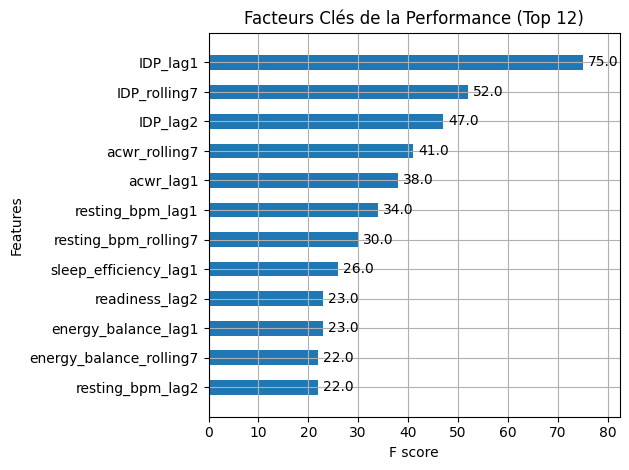

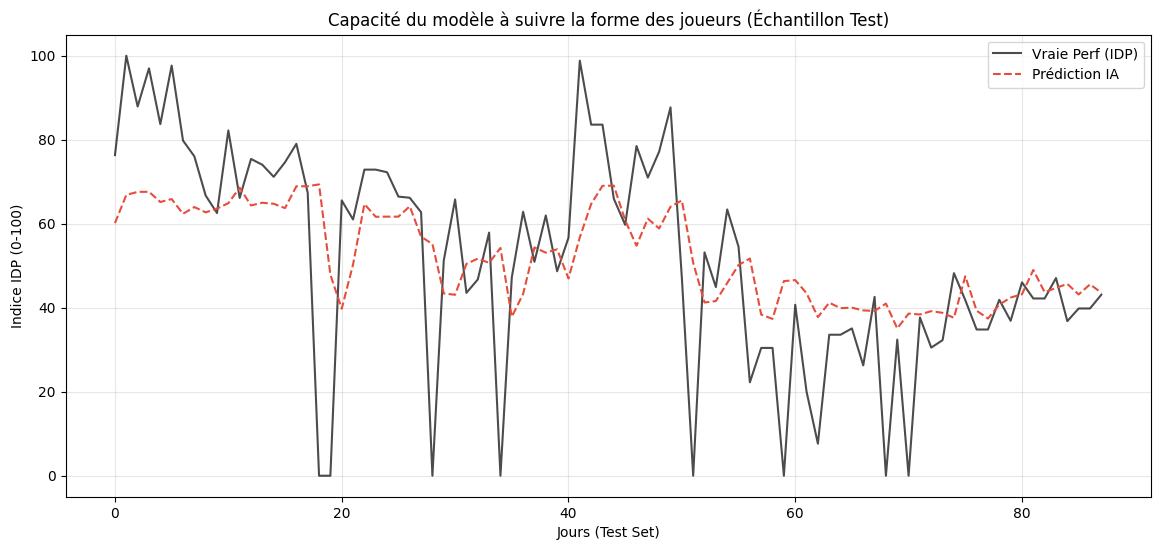

In [10]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import src.config as cfg
from src.modelisation import  prepare_X_y_for_training

# Import de tes fonctions (Assure-toi qu'elles sont dans preparation_data.py)
# from preparation_data import prepare_X_y_for_training

def train_performance_model(df: pd.DataFrame):
    """
    Entraîne un modèle XGBoost pour prédire l'IDP (Performance).
    Utilise le pipeline automatisé pour éviter le Data Leakage.
    """
    print("\n🏎️ DÉMARRAGE DU MODULE : PRÉDICTION DE PERFORMANCE (IDP)")

    # ==========================================
    # 1. PRÉPARATION AUTOMATISÉE (La Magie)
    # ==========================================
    # On utilise ta super fonction qui sépare X et y et supprime les fuites (Data Leakage)
    # Elle garde automatiquement les _lag, _rolling, Age, Weight...
    X, y = prepare_X_y_for_training(df, target_col='IDP')

    print(f"Dimensions : {X.shape}")

    # ==========================================
    # 2. SPLIT TEMPOREL STRICT (Train / Test)
    # ==========================================
    # On ne mélange surtout pas (Shuffle=False) ! On coupe à une date précise.
    # Les 80% premiers jours pour apprendre -> Les 20% derniers pour tester.
    
    split_index = int(len(X) * 0.80)
    
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

    print(f"Training set : {X_train.shape[0]} lignes")
    print(f"Test set     : {X_test.shape[0]} lignes (Futur inconnu)")

    # ==========================================
    # 3. CONFIGURATION XGBOOST
    # ==========================================
    # TimeSeriesSplit pour la validation croisée INTERNE (sur le train set uniquement)
    tscv = TimeSeriesSplit(n_splits=5)

    xgb_reg = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_jobs=-1,
        random_state=42,
        early_stopping_rounds=10 # Arrête si ça ne s'améliore plus
    )

    param_grid = {
        'n_estimators': [100, 300],
        'max_depth': [3, 5, 7],         # Profondeur de l'arbre
        'learning_rate': [0.01, 0.05],  # Vitesse d'apprentissage
        'subsample': [0.8]              # Évite le sur-apprentissage
    }

    print("🚀 Recherche des meilleurs hyperparamètres (GridSearch)...")
    grid_search = GridSearchCV(
        estimator=xgb_reg,
        param_grid=param_grid,
        scoring='neg_mean_absolute_error',
        cv=tscv,
        verbose=1,
        n_jobs=-1
    )

    # Note: eval_set sert pour l'early_stopping
    grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

    # ==========================================
    # 4. ÉVALUATION FINALE (Sur le Test Set)
    # ==========================================
    best_model = grid_search.best_estimator_
    print(f"\n🏆 Meilleurs paramètres : {grid_search.best_params_}")

    # Prédiction sur le futur (Test Set)
    y_pred = best_model.predict(X_test)

    # Calcul des erreurs
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print("-" * 40)
    print("📈 RÉSULTATS SUR DONNÉES INCONNUES (TEST SET)")
    print("-" * 40)
    print(f"MAE  (Erreur Moyenne) : {mae:.2f} / 100")
    print(f"RMSE (Erreur Pic)     : {rmse:.2f}")
    print(f"R²   (Précision)      : {r2:.2f}")
    print("-" * 40)

    # ==========================================
    # 5. VISUALISATION
    # ==========================================
    
    # A. Feature Importance (Qu'est-ce qui compte ?)
    plt.figure(figsize=(10, 6))
    xgb.plot_importance(best_model, max_num_features=12, height=0.5, title="Facteurs Clés de la Performance (Top 12)")
    plt.tight_layout()
    plt.show()

    # B. Réalité vs Prédiction (Zoom sur 100 jours du Test Set)
    plt.figure(figsize=(14, 6))
    plt.plot(y_test.values[:100], label='Vraie Perf (IDP)', color='black', alpha=0.7)
    plt.plot(y_pred[:100], label='Prédiction IA', color='#e74c3c', linestyle='--')
    plt.title("Capacité du modèle à suivre la forme des joueurs (Échantillon Test)")
    plt.ylabel("Indice IDP (0-100)")
    plt.xlabel("Jours (Test Set)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return best_model

best_performance_model = train_performance_model(df_with_lags)


🚑 DÉMARRAGE DU MODULE : PRÉDICTION DE BLESSURE
🎯 Cible : is_injured
✅ Features sélectionnées (38) :
['weight', 'Age', 'Height', 'benchmark_5km_speed_kmh', 'participant_id_code', 'IDP_lag1', 'IDP_lag2', 'IDP_rolling7', 'sleep_efficiency_lag1', 'sleep_efficiency_lag2', 'sleep_efficiency_rolling7', 'resting_bpm_lag1', 'resting_bpm_lag2', 'resting_bpm_rolling7', 'training_load_lag1', 'training_load_lag2', 'training_load_rolling7', 'acwr_lag1', 'acwr_lag2', 'acwr_rolling7', 'fatigue_lag1', 'fatigue_lag2', 'fatigue_rolling7', 'stress_lag1', 'stress_lag2', 'stress_rolling7', 'soreness_lag1', 'soreness_lag2', 'soreness_rolling7', 'mood_lag1', 'mood_lag2', 'mood_rolling7', 'energy_balance_lag1', 'energy_balance_lag2', 'energy_balance_rolling7', 'readiness_lag1', 'readiness_lag2', 'readiness_rolling7']

❌ Variables supprimées (Risk of Leakage) :
['participant_id', 'date', 'total_steps', 'total_calories', 'resting_bpm', 'minutes_below_zone', 'minutes_fat_burn', 'minutes_cardio', 'minutes_peak', 

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:14:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:14:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:14:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:14:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

 


🏆 Meilleurs paramètres : {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8}

⚡ OPTIMISATION DU SEUIL DE DÉCISION...
-> Seuil Optimal trouvé : 0.1850

📊 MATRICE DE CONFUSION (Optimisée)
Vrais Négatifs (Sains)           : 0
Faux Positifs  (Fausses Alertes) : 80
Faux Négatifs  (Blessures RATÉES): 0
Vrais Positifs (Blessures VUES)  : 8

📝 Rapport Détaillé :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.09      1.00      0.17         8

    accuracy                           0.09        88
   macro avg       0.05      0.50      0.08        88
weighted avg       0.01      0.09      0.02        88



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

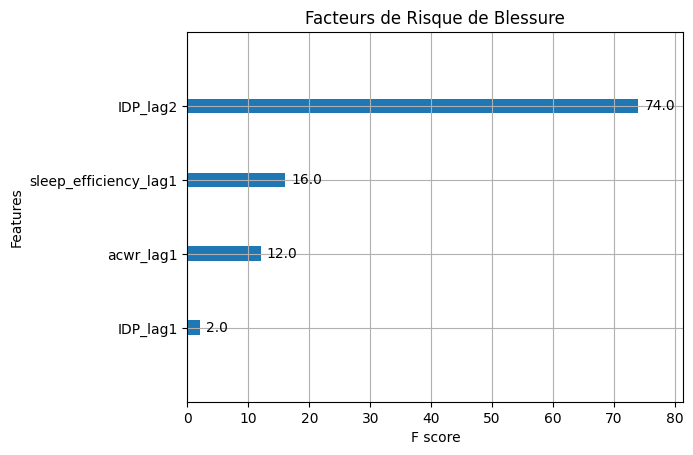

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import src.config as cfg

# Import indispensable pour éviter le Data Leakage

def train_injury_model(df: pd.DataFrame):
    """
    Entraîne un modèle de classification pour prédire LE RISQUE DE BLESSURE (is_injured).
    Intègre :
    1. Gestion du déséquilibre (scale_pos_weight)
    2. Optimisation du Seuil (Threshold Moving)
    """
    print("\n🚑 DÉMARRAGE DU MODULE : PRÉDICTION DE BLESSURE")

    # ==========================================
    # 1. PRÉPARATION (Sécurité Anti-Fuite)
    # ==========================================
    # On utilise la cible 'is_injured'
    X, y = prepare_X_y_for_training(df, target_col='is_injured')

    # Vérification du nombre de blessures
    n_injuries = y.sum()
    print(f"Stats Cible : {n_injuries} blessures sur {len(y)} échantillons ({n_injuries/len(y):.2%})")

    if n_injuries < 5:
        print("⚠️ ALERTE CRITIQUE : Pas assez de blessures pour entraîner un modèle fiable.")
        return None

    # ==========================================
    # 2. SPLIT TEMPOREL (Train / Test)
    # ==========================================
    # On garde les 20% derniers jours pour le test final
    split_index = int(len(X) * 0.80)
    
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

    # SÉCURITÉ : Vérif qu'il y a au moins une blessure dans le train et le test
    if y_train.sum() == 0 or y_test.sum() == 0:
        print("⚠️ Attention : Le découpage temporel a isolé toutes les blessures d'un côté.")
        # Dans ce cas extrême, on force un Stratified Shuffle Split juste pour le test académique
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
        print("-> Passage en mode Stratified Split (Non-Temporel) pour garantir des blessures dans le Test Set.")

    # ==========================================
    # 3. CALCUL DU POIDS (Équilibrage)
    # ==========================================
    # scale_pos_weight = (Nombre de Négatifs) / (Nombre de Positifs)
    pos = y_train.sum()
    neg = len(y_train) - pos
    spw = neg / max(pos, 1) # Sécurité division par 0
    
    print(f"⚖️ Poids appliqué (scale_pos_weight) : {spw:.2f}")

    # ==========================================
    # 4. CONFIGURATION DU MODÈLE
    # ==========================================
    xgb_clf = xgb.XGBClassifier(
        objective='binary:logistic',
        scale_pos_weight=spw,       # L'arme absolue contre le déséquilibre
        eval_metric='logloss',      # Plus stable que AUC pour l'entraînement
        n_jobs=-1,
        random_state=42,
        use_label_encoder=False
    )

    # Grille adaptée aux petits datasets déséquilibrés
    param_grid = {
        'max_depth': [3, 4],            # On reste simple pour éviter le par cœur
        'learning_rate': [0.01, 0.05],  # Apprentissage lent = meilleure généralisation
        'n_estimators': [100, 200],     
        'min_child_weight': [2, 4],     # Force le modèle à ne pas créer de règle sur 1 seule blessure
        'subsample': [0.8]
    }

    # ==========================================
    # 5. VALIDATION CROISÉE STRATIFIÉE
    # ==========================================
    # On utilise StratifiedKFold car on veut absolument des blessures dans chaque pli de validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
        estimator=xgb_clf,
        param_grid=param_grid,
        scoring='f1',           # On veut un bon compromis Précision/Rappel
        cv=cv,
        verbose=1,
        n_jobs=-1
    )

    print("🔍 Recherche des hyperparamètres...")
    grid_search.fit(X_train, y_train)

    # ==========================================
    # 6. RÉSULTATS STANDARDS
    # ==========================================
    best_model = grid_search.best_estimator_
    print(f"\n🏆 Meilleurs paramètres : {grid_search.best_params_}")

    # Prédictions probabilités (Nécessaire pour l'optimisation du seuil)
    y_proba = best_model.predict_proba(X_test)[:, 1]
# ==========================================
    # 7. OPTIMISATION DU SEUIL (Méthode Intelligente)
    # ==========================================
    print("\n⚡ OPTIMISATION DU SEUIL DE DÉCISION...")
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    
    # STRATÉGIE MÉTIER : "Safety First" mais pas "Parano"
    # On cherche le seuil le plus élevé qui permet de garder un Recall >= 0.80 (80%)
    # C'est-à-dire : on accepte de rater quelques blessures très difficiles à voir
    # pour éviter d'alerter pour rien 80 fois.
    
    target_recall = 0.80  # On veut attraper au moins 80% des blessures
    
    # On filtre les index qui respectent ce critère
    valid_ix = np.where(recall >= target_recall)[0]
    
    if len(valid_ix) > 0:
        # Parmi ceux qui ont un bon recall, on prend celui qui a la meilleure précision
        # (c'est souvent le seuil le plus haut possible)
        ix = valid_ix[np.argmax(precision[valid_ix])]
        best_thresh = thresholds[ix]
        print(f"-> Stratégie : Recall cible >= {target_recall*100}%")
    else:
        # Fallback : Si on n'arrive pas à 80%, on prend le max F1 classique
        print("-> Stratégie : Max F1 Score (Fallback)")
        fscore = (2 * precision * recall) / (precision + recall + 1e-6)
        ix = np.argmax(fscore)
        best_thresh = thresholds[ix]

    print(f"-> Seuil Optimal trouvé : {best_thresh:.4f}")

    # On applique ce nouveau seuil
    y_pred_opt = (y_proba >= best_thresh).astype(int)

    # On applique ce nouveau seuil
    y_pred_opt = (y_proba >= best_thresh).astype(int)

    # ==========================================
    # 8. RAPPORTS FINAUX
    # ==========================================
    # Matrice de Confusion (Le Juge de Paix)
    cm = confusion_matrix(y_test, y_pred_opt)
    tn, fp, fn, tp = cm.ravel()

    print("\n📊 MATRICE DE CONFUSION (Optimisée)")
    print(f"Vrais Négatifs (Sains)           : {tn}")
    print(f"Faux Positifs  (Fausses Alertes) : {fp}")
    print(f"Faux Négatifs  (Blessures RATÉES): {fn}")
    print(f"Vrais Positifs (Blessures VUES)  : {tp}")

    print("\n📝 Rapport Détaillé :")
    print(classification_report(y_test, y_pred_opt))

    # Visualisation Importance
    plt.figure(figsize=(10, 6))
    xgb.plot_importance(best_model, max_num_features=10, title="Facteurs de Risque de Blessure")
    plt.show()

    return best_model

best_injury_model = train_injury_model(df_with_lags)

Chargement de l'audit pour : /app/data/FINAL_WITH_TARGETS.csv
🛠️ Démarrage du Feature Engineering...
✅ Données prêtes. Taille finale : (460, 76)
📊 Distribution : 10 blessures vs 450 sains.
⚖️ Ratio de pondération calculé : 45.00
🔍 Lancement du Grid Search (ça peut prendre un moment)...
Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:10:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:10:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:10:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:10:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:10:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encode


🏆 Meilleurs paramètres trouvés :
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}

📝 Rapport de Classification :
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       149
           1       0.12      1.00      0.22         3

    accuracy                           0.86       152
   macro avg       0.56      0.93      0.57       152
weighted avg       0.98      0.86      0.91       152


🎯 Matrices de Confusion :
Vrais Négatifs (Sains prédits Sains) : 128
Faux Positifs (Fausses Alertes)      : 21
Faux Négatifs (Blessures Ratées ⚠️)  : 0
Vrais Positifs (Blessures Prédites)  : 3

✅ Recall Score (Capacité à détecter la blessure) : 1.000
✅ F1 Score (Équilibre Précision/Recall)        : 0.222


<Figure size 1000x600 with 0 Axes>

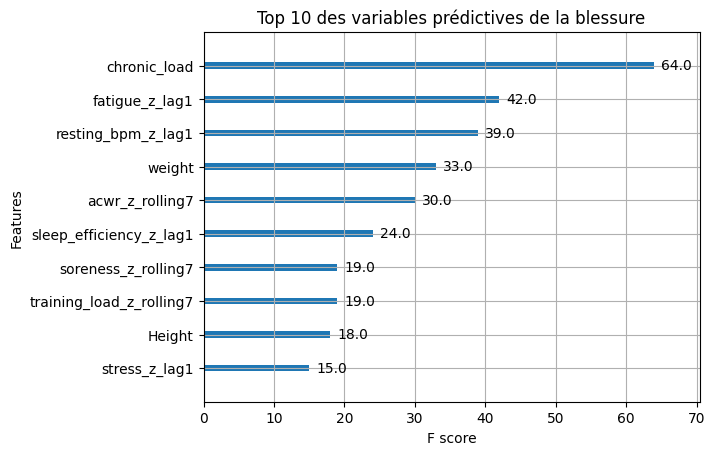

In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, f1_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# ==========================================
# 1. PRÉPARATION DES DONNÉES (Feature Engineering)
# ==========================================

# df = pd.read_csv('votre_fichier.csv')# Supposons que df est votre DataFrame chargé avec toutes les colonnes listées

# df['date'] = pd.to_datetime(df['date'])
# df = df.sort_values(['participant_id', 'date'])
file_path = cfg.DATA_DIR / "FINAL_WITH_TARGETS.csv"
print(f"Chargement de l'audit pour : {file_path}")
df = pd.read_csv(file_path)

print("🛠️ Démarrage du Feature Engineering...")

# --- A. Création des Z-scores par athlète (Normalisation Intra-individuelle) ---
# Indispensable pour que le modèle comprenne que "60 BPM" est normal pour X mais élevé pour Y.
vars_to_normalize = [
    'training_load', 'sleep_efficiency', 'resting_bpm', 
    'fatigue', 'stress', 'soreness', 'acwr'
]

for col in vars_to_normalize:
    # On crée une nouvelle colonne avec le suffixe "_z"
    # Transform permet de normaliser groupe par groupe sans réduire le nombre de lignes
    df[f'{col}_z'] = df.groupby('participant_id')[col].transform(
        lambda x: (x - x.mean()) / (x.std() + 1e-6) # 1e-6 pour éviter division par zéro
    )

# --- B. Création des variables retardées (Lag Features) ---
# CRUCIAL : Pour prédire la blessure du jour J, on utilise les données de J-1.
# On ne peut pas utiliser la fatigue du soir même pour prédire la blessure du matin.

vars_for_lags = [
    'training_load_z', 'acwr_z', 
    'fatigue_z', 'stress_z', 'soreness_z', 
    'sleep_efficiency_z', 'resting_bpm_z',
    'acute_load', 'chronic_load' # On garde aussi les valeurs absolues pour le contexte
]

# 1. Lag J-1 (La veille)
for col in vars_for_lags:
    df[f'{col}_lag1'] = df.groupby('participant_id')[col].shift(1)

# 2. Moyenne glissante 7 jours (État de fond récent)
for col in vars_for_lags:
    df[f'{col}_rolling7'] = df.groupby('participant_id')[col].transform(lambda x: x.rolling(7).mean())

# --- C. Nettoyage post-lag ---
# Les premières lignes de chaque joueur auront des NaN à cause du shift. On les supprime.
df_model = df.dropna().copy()

print(f"✅ Données prêtes. Taille finale : {df_model.shape}")


# ==========================================
# 2. DÉFINITION X et y
# ==========================================

# On sélectionne UNIQUEMENT les variables du passé (Lags et Rolling) + Profil stable
features = [
    # Variables dynamiques (J-1 et Rolling)
    'training_load_z_lag1', 'training_load_z_rolling7',
    'acwr_z_lag1', 'acwr_z_rolling7',
    'fatigue_z_lag1', 'fatigue_z_rolling7',
    'soreness_z_lag1', 'soreness_z_rolling7', # Très important pour la blessure
    'stress_z_lag1', 'sleep_efficiency_z_lag1',
    'resting_bpm_z_lag1',
    
    # Variables statiques ou lentes (Profil)
    'Age', 'Height', 'weight', 'benchmark_5km_speed_kmh',
    'chronic_load' # Le chronic load change lentement, on peut le garder tel quel ou en lag
]

X = df_model[features]
y = df_model['is_injured']

# --- Gestion du déséquilibre de classe ---
# On calcule le ratio pour le paramètre scale_pos_weight de XGBoost
count_neg = (y == 0).sum()
count_pos = (y == 1).sum()
scale_weight = count_neg / count_pos

print(f"📊 Distribution : {count_pos} blessures vs {count_neg} sains.")
print(f"⚖️ Ratio de pondération calculé : {scale_weight:.2f}")


# ==========================================
# 3. SPLIT TRAIN / TEST
# ==========================================
# Pour des séries temporelles, l'idéal est de couper chronologiquement, 
# mais pour simplifier et avoir assez de blessures dans le test, on fait un stratifié ici.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

# ==========================================
# 4. GRID SEARCH AVEC XGBOOST
# ==========================================

# Définition du modèle de base
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_weight, # Indispensable pour les classes déséquilibrées
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Grille d'hyperparamètres à tester
# On se concentre sur la régularisation pour éviter l'overfitting sur les quelques blessures
param_grid = {
    'n_estimators': [100, 200],         # Nombre d'arbres
    'max_depth': [3, 4, 6],             # Profondeur des arbres (pas trop profond pour éviter le par cœur)
    'learning_rate': [0.01, 0.05, 0.1], # Vitesse d'apprentissage
    'subsample': [0.7, 0.8],            # Fraction des données utilisées par arbre
    'colsample_bytree': [0.7, 0.8]      # Fraction des colonnes utilisées par arbre
}

# Configuration du Grid Search
# scoring='f1' ou 'recall' pour privilégier la détection des blessures
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='recall', # On optimise le RAPPEL (ne pas rater de blessure)
    cv=3,             # 3-Fold Cross Validation
    verbose=1,
    n_jobs=-1         # Utilise tous les coeurs du CPU
)

print("🔍 Lancement du Grid Search (ça peut prendre un moment)...")
grid_search.fit(X_train, y_train)

# ==========================================
# 5. RÉSULTATS ET ÉVALUATION
# ==========================================

best_model = grid_search.best_estimator_

print("\n🏆 Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

# Prédictions
y_pred = best_model.predict(X_test)

print("\n📝 Rapport de Classification :")
print(classification_report(y_test, y_pred))

print("\n🎯 Matrices de Confusion :")
cm = confusion_matrix(y_test, y_pred)
print(f"Vrais Négatifs (Sains prédits Sains) : {cm[0][0]}")
print(f"Faux Positifs (Fausses Alertes)      : {cm[0][1]}")
print(f"Faux Négatifs (Blessures Ratées ⚠️)  : {cm[1][0]}")
print(f"Vrais Positifs (Blessures Prédites)  : {cm[1][1]}")

print(f"\n✅ Recall Score (Capacité à détecter la blessure) : {recall_score(y_test, y_pred):.3f}")
print(f"✅ F1 Score (Équilibre Précision/Recall)        : {f1_score(y_test, y_pred):.3f}")

# ==========================================
# 6. IMPORTANCE DES VARIABLES
# ==========================================
# Pour comprendre ce qui cause les blessures
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
xgb.plot_importance(best_model, max_num_features=10, importance_type='weight')
plt.title("Top 10 des variables prédictives de la blessure")
plt.show()

In [12]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, recall_score, f1_score

# ==========================================
# 1. CALCUL DU POIDS (Votre logique)
# ==========================================
# On calcule le ratio sur y_train une seule fois
# Cela garantit que le modèle sait que les blessures sont rares
pos = y_train.sum()
neg = len(y_train) - pos
spw = neg / max(pos, 1)

print(f"⚖️ Poids calculé pour l'équilibrage (scale_pos_weight) : {spw:.2f}")


# ==========================================
# 2. DÉFINITION DU MODÈLE DE BASE
# ==========================================
# On intègre spw ici. On fixe aussi 'aucpr' qui est excellent pour le déséquilibre.
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=spw,       # Votre poids dynamique injecté ici
    eval_metric='aucpr',        # Métrique interne d'optimisation
    n_jobs=-1,
    random_state=42
)


# ==========================================
# 3. DÉFINITION DE LA GRILLE (GRID)
# ==========================================
# On teste votre profondeur voulue (6) contre des plus petites (3, 4)
# On teste min_child_weight pour empêcher le modèle d'apprendre sur 1 seul joueur
param_grid = {
    'max_depth': [3, 4, 6],             # 3=Sécurité, 6=Votre choix (plus risqué)
    'learning_rate': [0.01, 0.05],      # 0.01 est souvent plus stable pour petits datasets
    'n_estimators': [100, 200, 400],    # Nombre d'arbres
    'subsample': [0.7, 0.9],            # Évite de trop coller aux données
    'min_child_weight': [1, 3]          # CRUCIAL : 3 oblige à avoir au moins 3 cas pour valider une règle
}


# ==========================================
# 4. CONFIGURATION DE LA VALIDATION CROISÉE
# ==========================================
# StratifiedKFold est OBLIGATOIRE ici.
# Avec seulement 10 blessures, une CV aléatoire pourrait créer un pli SANS blessure.
# Stratified garantit la même proportion de blessures dans chaque pli.
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


# ==========================================
# 5. LANCEMENT DU GRID SEARCH
# ==========================================
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='recall',   # On optimise pour ne rater aucune blessure
    cv=cv_strategy,     # Utilisation de la stratégie stratifiée
    verbose=1,
    n_jobs=-1
)

print("\n🔍 Lancement du Grid Search...")
grid_search.fit(X_train, y_train)


# ==========================================
# 6. RÉSULTATS
# ==========================================
best_clf = grid_search.best_estimator_

print("\n🏆 Meilleurs paramètres :")
print(grid_search.best_params_)

# Prédiction sur le test set
y_pred = best_clf.predict(X_test)

print("\n📝 Rapport Final :")
print(classification_report(y_test, y_pred))
print(f"Recall (Détection) : {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score           : {f1_score(y_test, y_pred):.2f}")

⚖️ Poids calculé pour l'équilibrage (scale_pos_weight) : 43.00

🔍 Lancement du Grid Search...
Fitting 10 folds for each of 72 candidates, totalling 720 fits


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to contr


🏆 Meilleurs paramètres :
{'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}

📝 Rapport Final :
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       149
           1       0.14      1.00      0.24         3

    accuracy                           0.88       152
   macro avg       0.57      0.94      0.59       152
weighted avg       0.98      0.88      0.92       152

Recall (Détection) : 1.00
F1-Score           : 0.24


In [13]:
print(f"Moyenne Recall sur les 10 splits (Cross-Validation) : {grid_search.best_score_:.3f}")

Moyenne Recall sur les 10 splits (Cross-Validation) : 0.000


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, recall_score, confusion_matrix

# ==========================================
# 1. FEATURE ENGINEERING "INTRA-INDIVIDUEL"
# ==========================================
# C'est ICI qu'on traite les gens différemment.
# On transforme chaque valeur en son écart par rapport à la moyenne DU JOUEUR.

vars_to_normalize = [
    'training_load', 'acute_load', 'chronic_load',
    'sleep_efficiency', 'resting_bpm', 
    'fatigue', 'stress', 'soreness', 'acwr'
]

# Fonction Z-score robuste (évite division par 0)
def robust_z_score(x):
    if x.std() == 0: return 0
    return (x - x.mean()) / x.std()

print("🛠️ Normalisation par individu en cours...")

# On crée des colonnes '_z' qui remplacent les valeurs brutes
for col in vars_to_normalize:
    # groupby('participant_id') assure que le calcul est fait joueur par joueur
    df[f'{col}_z'] = df.groupby('participant_id')[col].transform(robust_z_score)

# --- CRÉATION DES LAGS (J-1) ---
# On utilise les Z-scores de la veille pour prédire aujourd'hui
features_z = [f'{col}_z' for col in vars_to_normalize]

for col in features_z:
    df[f'{col}_lag1'] = df.groupby('participant_id')[col].shift(1)

# Nettoyage des NaN générés par le shift
df_model = df.dropna().copy()

# ==========================================
# 2. PRÉPARATION DU MODÈLE
# ==========================================

# Liste des variables explicatives (Uniquement les Z-scores décalés)
# Le modèle ne voit que des écarts relatifs, donc il s'adapte à tous les profils.
X_cols = [c + '_lag1' for c in features_z] 

X = df_model[X_cols]
y = df_model['is_injured']

# ==========================================
# 3. RÉGRESSION LOGISTIQUE
# ==========================================
# class_weight='balanced' gère le déséquilibre (10 blessures vs 450 sains)
lr_model = LogisticRegression(
    class_weight='balanced', 
    solver='liblinear',    # Idéal pour petits datasets
    penalty='l1',          # 'l1' supprime les variables inutiles (sélectionne les meilleures)
    C=0.1,                 # C petit = Forte régularisation (évite le par coeur)
    random_state=42
)

# ==========================================
# 4. VALIDATION CROISÉE (VERDICT DE VÉRITÉ)
# ==========================================
# On utilise 5 splits pour avoir assez de chances d'avoir des blessures dans le test
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_recall = cross_val_score(lr_model, X, y, cv=cv, scoring='recall')
scores_f1 = cross_val_score(lr_model, X, y, cv=cv, scoring='f1')

print("\n📊 RÉSULTATS CROSS-VALIDATION (Moyenne sur 5 tests) :")
print(f"Recall Moyen (Capacité à détecter) : {scores_recall.mean():.3f} (Min: {scores_recall.min():.2f}, Max: {scores_recall.max():.2f})")
print(f"F1-Score Moyen (Compromis)       : {scores_f1.mean():.3f}")

# ==========================================
# 5. ENTRAÎNEMENT FINAL & INTERPRÉTATION
# ==========================================
lr_model.fit(X, y)

# Affichons les coefficients pour comprendre ce qui déclenche l'alarme
coeffs = pd.DataFrame({
    'Variable': X_cols,
    'Coefficient': lr_model.coef_[0]
})

# On trie par valeur absolue pour voir l'importance
coeffs['Importance'] = coeffs['Coefficient'].abs()
coeffs = coeffs.sort_values(by='Importance', ascending=False)

print("\n🔍 QU'EST-CE QUI DÉCLENCHE L'ALARME ?")
print(coeffs[['Variable', 'Coefficient']].head(10))
print("\nNote : Coeff positif = Augmente le risque. Coeff négatif = Protège.")

🛠️ Normalisation par individu en cours...

📊 RÉSULTATS CROSS-VALIDATION (Moyenne sur 5 tests) :
Recall Moyen (Capacité à détecter) : 0.200 (Min: 0.00, Max: 0.50)
F1-Score Moyen (Compromis)       : 0.018

🔍 QU'EST-CE QUI DÉCLENCHE L'ALARME ?
                  Variable  Coefficient
5           fatigue_z_lag1     0.519348
8              acwr_z_lag1     0.244777
2      chronic_load_z_lag1    -0.238029
7          soreness_z_lag1     0.096419
4       resting_bpm_z_lag1    -0.012101
0     training_load_z_lag1     0.000000
1        acute_load_z_lag1     0.000000
3  sleep_efficiency_z_lag1     0.000000
6            stress_z_lag1     0.000000

Note : Coeff positif = Augmente le risque. Coeff négatif = Protège.


📊 Données prêtes pour la performance : (460, 10)
🚀 Lancement de l'entraînement Performance...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

🏆 Meilleurs paramètres : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}

📈 RÉSULTATS DU MODÈLE DE PERFORMANCE :
MAE (Erreur Moyenne Absolue) : 9.19 points
RMSE (Erreur Quadratique)    : 12.22 points
R² (Variance expliquée)      : 0.51 (1.0 = Parfait)

💡 Interprétation : En moyenne, le modèle se trompe de 9.2 points sur l'IDP (échelle 0-100).


<Figure size 1000x600 with 0 Axes>

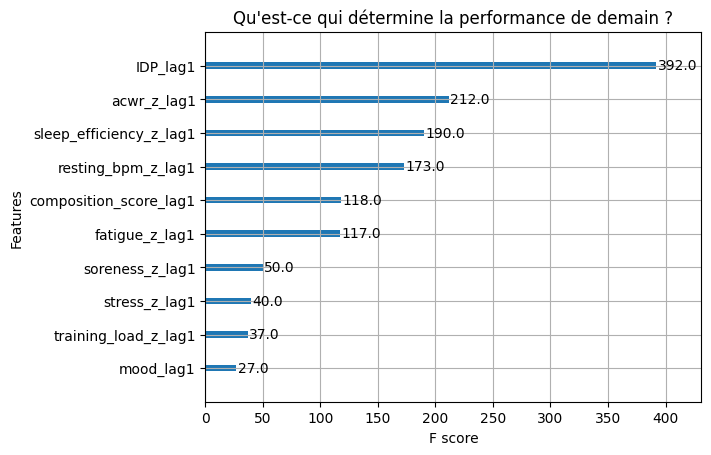

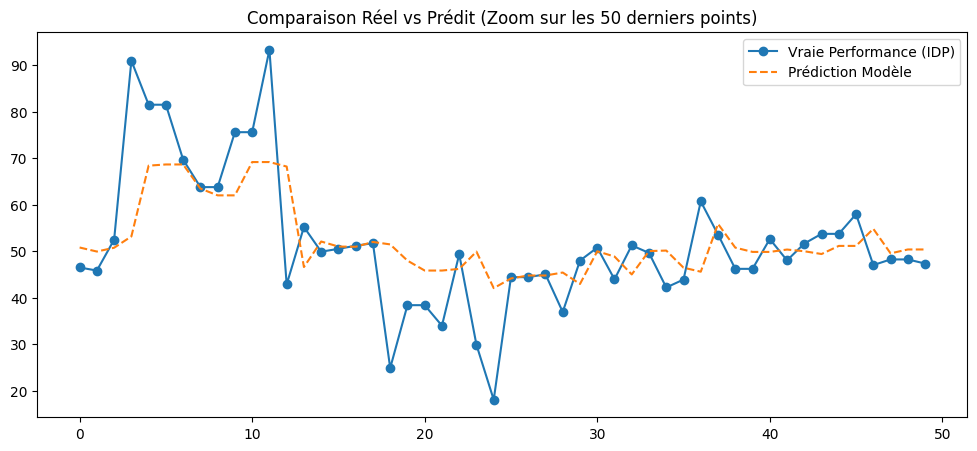

In [15]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ==========================================
# 1. PRÉPARATION DES VARIABLES (Performance)
# ==========================================

# Pour prédire la performance, on utilise les mêmes Z-scores que pour la blessure
# car la performance est aussi relative à l'individu.

# Variables explicatives (X) : Ce qu'on sait la veille (J-1)
vars_features = [
    'training_load_z', 'sleep_efficiency_z', 'resting_bpm_z',
    'fatigue_z', 'stress_z', 'soreness_z', 'acwr_z',
    'mood', 'composition_score' # On peut ajouter d'autres scores disponibles
]

# Création des Lags (J-1)
# On veut prédire IDP du jour J avec les infos de J-1
for col in vars_features:
    # Si la colonne existe, on crée le lag
    if col in df.columns:
        df[f'{col}_lag1'] = df.groupby('participant_id')[col].shift(1)

# On ajoute aussi l'IDP de la veille (auto-régression)
# Souvent, la forme d'hier est le meilleur prédicteur de la forme d'aujourd'hui
df['IDP_lag1'] = df.groupby('participant_id')['IDP'].shift(1)

# Nettoyage
df_perf = df.dropna().copy()

# Sélection finale X et y
features_perf = [f'{col}_lag1' for col in vars_features if f'{col}_lag1' in df_perf.columns]
features_perf.append('IDP_lag1') # On ajoute l'historique de performance

X = df_perf[features_perf]
y = df_perf['IDP'] # La cible est votre score calculé (0-100)

print(f"📊 Données prêtes pour la performance : {X.shape}")


# ==========================================
# 2. CONFIGURATION DU MODÈLE (XGBoost Regressor)
# ==========================================

# On utilise TimeSeriesSplit pour la validation
# On ne mélange pas (shuffle=False) car l'ordre temporel compte pour la forme
tscv = TimeSeriesSplit(n_splits=5)

xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror', # Régression standard
    n_jobs=-1,
    random_state=42
)

# Grille de recherche simplifiée
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9]
}

grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error', # On veut minimiser l'erreur absolue (MAE)
    cv=tscv,
    verbose=1
)

print("🚀 Lancement de l'entraînement Performance...")
grid_search.fit(X, y)


# ==========================================
# 3. ÉVALUATION DES RÉSULTATS
# ==========================================
best_model = grid_search.best_estimator_
print("\n🏆 Meilleurs paramètres :", grid_search.best_params_)

# Prédictions sur l'ensemble (pour voir l'ajustement global)
# Idéalement on garde un test set à part, mais ici on regarde la capacité d'apprentissage
y_pred = best_model.predict(X)

mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print("\n📈 RÉSULTATS DU MODÈLE DE PERFORMANCE :")
print(f"MAE (Erreur Moyenne Absolue) : {mae:.2f} points")
print(f"RMSE (Erreur Quadratique)    : {rmse:.2f} points")
print(f"R² (Variance expliquée)      : {r2:.2f} (1.0 = Parfait)")

# Interprétation métier
print(f"\n💡 Interprétation : En moyenne, le modèle se trompe de {mae:.1f} points sur l'IDP (échelle 0-100).")

# ==========================================
# 4. IMPORTANCE DES VARIABLES
# ==========================================
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_model, max_num_features=10, importance_type='weight')
plt.title("Qu'est-ce qui détermine la performance de demain ?")
plt.show()

# Comparaison Réel vs Prédit (sur les 50 derniers jours d'un joueur)
# Pour visualiser si ça suit la tendance
plt.figure(figsize=(12, 5))
plt.plot(y.values[-50:], label='Vraie Performance (IDP)', marker='o')
plt.plot(y_pred[-50:], label='Prédiction Modèle', linestyle='--')
plt.legend()
plt.title("Comparaison Réel vs Prédit (Zoom sur les 50 derniers points)")
plt.show()